<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/ML_Examples/FuncApproxV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Function Approximation using TensorFlow v1

Train a two-layer neural network to approximate a 2D function:
- $f(x_1, x_2) = \sin\left( \frac{\pi}{2} x_1 \right) \cos \left( \frac{\pi}{4} x_2 \right)$

In [1]:
# %tensorflow_version 1.x
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

!python --version

print("TensorFlow Version: ", tf.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
Python 3.11.7
TensorFlow Version:  2.15.0


In [2]:
def ReLU(x):
    if x > 0.0:
        return x
    else:
        return 0.0

# Visualize the original function
def visualize_original(Width,Height,U,V):
    H2 = np.empty((Height,Width))
    for i in range(Width):
        u = U * ((i - Width/2.0) / (Width/2.0))
        for j in range(Height):
            v = V *((j - Height/2.0) / (Height/2.0))
            H2[j,i] = np.sin(3.14*u/2.0)*np.cos(3.14*v/4.0)  #The 2D func

    return H2

# Visualize the NN model output
def visualize_2layer(Width,Height,U,V,W1,b1,W2,b2):
    H2 = np.empty((Height,Width))
    for i in range(Width):
        u = U * ((i - Width/2.0) / (Width/2.0))
        for j in range(Height):
            v = V *((j - Height/2.0) / (Height/2.0))
            x = [u,v]
            h1 = np.vectorize(ReLU)(x*W1+b1)
            h2 = h1 * W2 + b2
            H2[j,i] = h2[0,0]
            
    return H2

# The 2D function that is to be modeled 
def F_mv(x1,x2):
    return np.sin(3.14*x1/2.0)*np.cos(3.14*x2/4.0)

In [3]:
# Generate training data
A = 2
nb_samples = 1000
F = F_mv
X_train = np.random.uniform(-A,A,(nb_samples,2))

Y_train = np.zeros(shape=(nb_samples,1))

for i in range(nb_samples):
    Y_train[i] = [F(X_train[i][0],X_train[i][1])]

In [4]:
# Two-Layer Neural Network Structure
N1 = 200  #Number of neurons in the hidden layer

tf.reset_default_graph()
session = tf.InteractiveSession()

with tf.variable_scope("Input"):
    x = tf.placeholder(tf.float32,shape=[None,2])
    
with tf.variable_scope("HiddenLayer"):
    W1 = tf.Variable(tf.truncated_normal([2,N1],stddev=np.sqrt(6/(2+N1))))
    b1 = tf.Variable(tf.zeros([N1]))
    h1 = tf.nn.relu(tf.add(tf.matmul(x,W1),b1))

with tf.variable_scope("OutputLayer"):
    W2 = tf.Variable(tf.truncated_normal([N1,1],stddev=np.sqrt(6/(1+N1))))
    b2 = tf.Variable(tf.constant(0.0))
    h2 = tf.add(tf.matmul(h1,W2),b2)
    
with tf.variable_scope("Output"):
    y = tf.placeholder(tf.float32,[None,1])
    
with tf.variable_scope("Loss"):
    Loss = tf.reduce_mean(tf.square(h2 - y))

In [5]:
# Optimization
eta = 1e-4
optimizer_one_step = tf.train.AdamOptimizer(eta).minimize(Loss)
session.run(tf.global_variables_initializer())

# File_Writer = tf.summary.FileWriter('.\\TwoLayergraph',session.graph)

epochs = int(5e4)
batch_size = 100
epochs_between_two_evaluations = 1e3

for i in range(epochs):
    idx = np.random.permutation(X_train.shape[0])[:batch_size]
    feed_dict = {x:X_train[idx],y:Y_train[idx]}
    optimizer_one_step.run(feed_dict=feed_dict)
    if i % epochs_between_two_evaluations == 0:
        [curr_loss] = session.run([Loss],{x:X_train,y:Y_train})
        print(curr_loss)

0.38838762


2024-03-12 16:57:05.935279: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


0.060170807
0.023332035
0.008119585
0.003443335
0.0015770895
0.0007534935
0.00038886376
0.00024670069
0.00019016226
0.00016340775
0.00015173867
0.00014264295
0.00013458364
0.00013355348
0.00014164038
0.00012707734
0.0001217744
0.00012346075
0.00013229976
0.00011331692
0.00011267169
0.000111337176
0.00011608662
0.00011052788
0.00010774164
0.0001089759
0.00011478353
0.00011158054
0.00010571185
0.00010437229
0.00010825343
0.00010390167
0.00011603657
0.000106597654
0.00010411196
0.00010226438
0.00010297406
9.904674e-05
0.000104358136
0.00010346599
0.0001060024
9.7585675e-05
0.000102051985
0.00010473522
0.00010105227
9.9229044e-05
9.517577e-05
9.625173e-05
0.00010327566


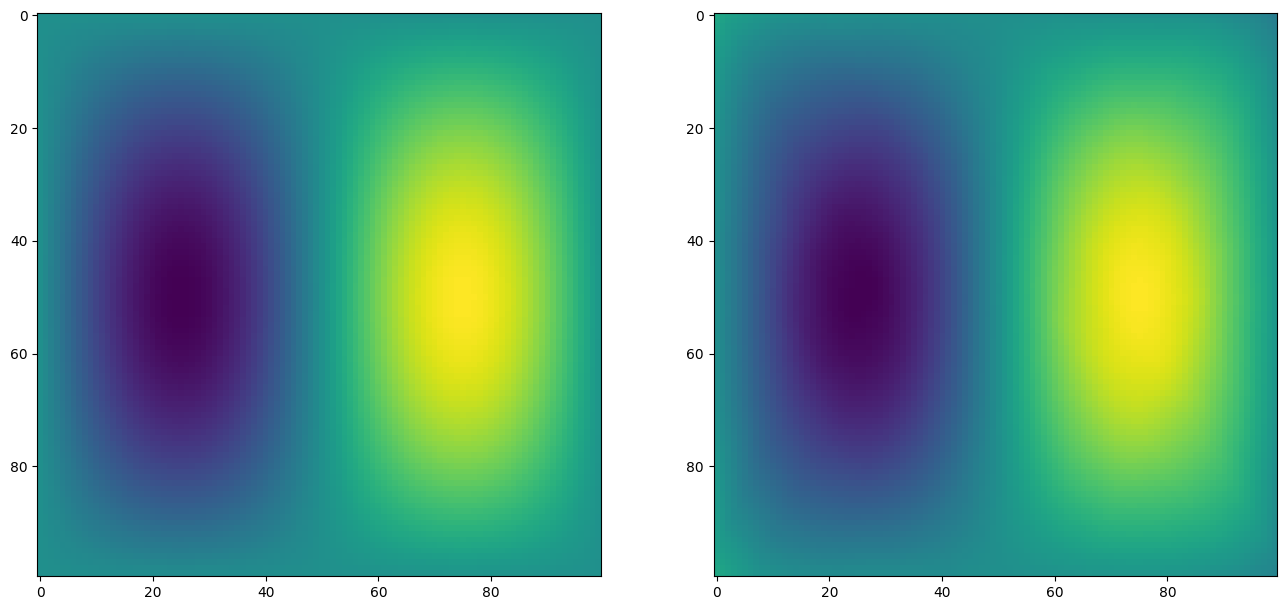

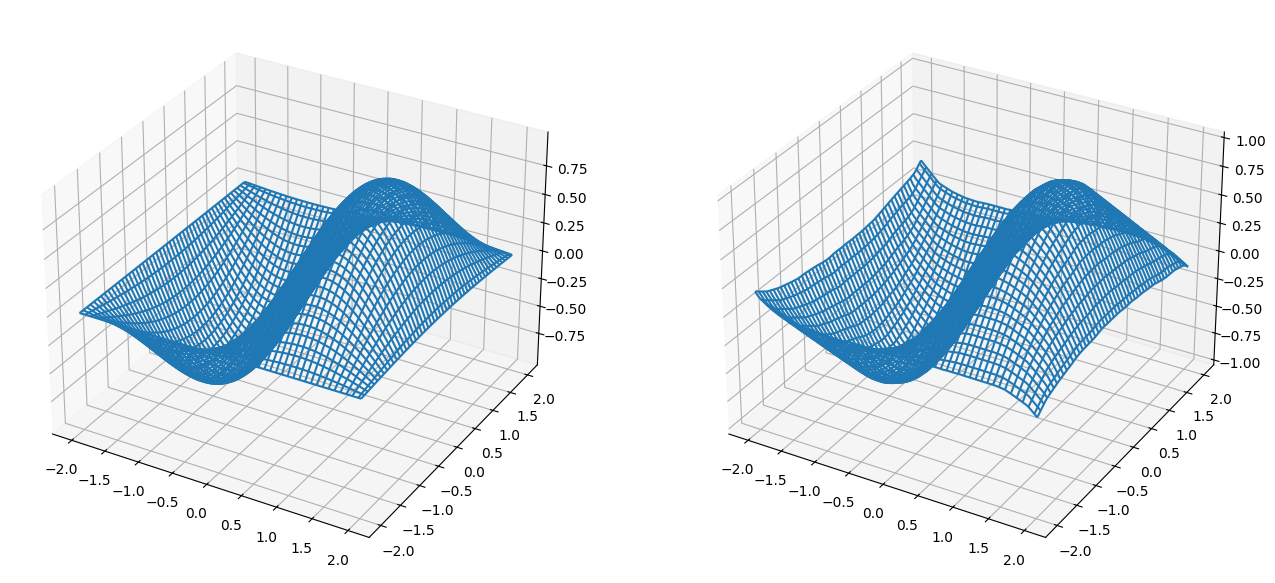

In [6]:
# Visualize the predicted function
[curr_W1,curr_b1,curr_W2,curr_b2,curr_loss] = session.run([W1,b1,W2,b2,Loss],{x:X_train,y:Y_train})

curr_W1 = np.asmatrix(curr_W1)
curr_W2 = np.asmatrix(curr_W2)

I_original = visualize_original(100,100,A,A)

I = visualize_2layer(100,100,A,A,curr_W1,curr_b1,curr_W2,curr_b2)

f = plt.figure(figsize=(16, 8))

f.add_subplot(1,2, 1)
plt.imshow(I_original)
f.add_subplot(1,2, 2)
plt.imshow(I)
# plt.show(block=True)

x = np.linspace(-A, A, 100)
y = np.linspace(-A, A, 100)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121,projection='3d')
ax1.plot_wireframe(X, Y, I_original)
ax2 = fig.add_subplot(122,projection='3d')
ax2.plot_wireframe(X, Y, I)

session.close()